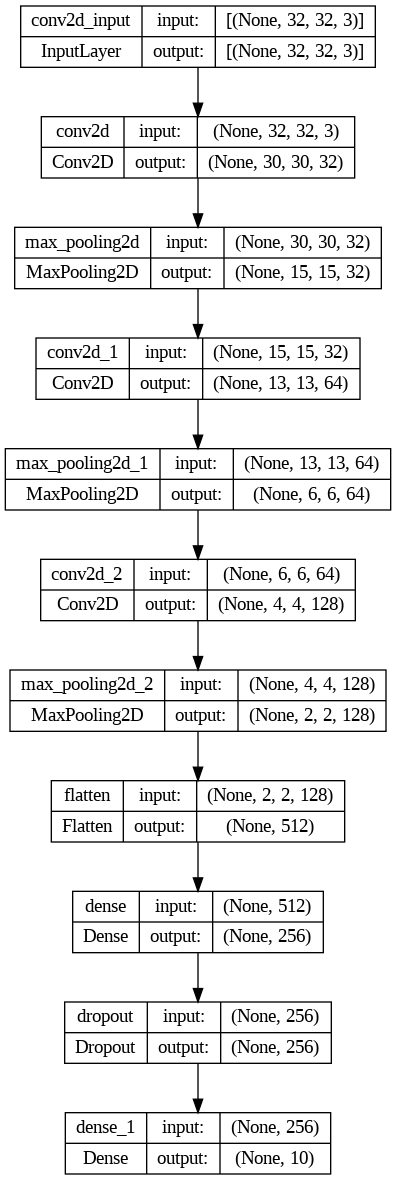

In [ ]:
#CNN visualization

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True)


In [7]:
#CNN construction and epoch training


import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([ #Architecture of CNN
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #First layer 32 nodes wide, each node 3x3. Image inputs are 32x32pixels and in 3 color chanels (RGB)
    MaxPooling2D(2, 2), #Parameter reduction
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',                #updates the model's weights during the training process
              loss='categorical_crossentropy', #difference between the model's predictions and the true labels of the data
              metrics=['accuracy'])            #assess the performance of the model during training and validation through acuraccy in this case

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")




Epoch 1/20
782/782 [==============================] - 92s 117ms/step - loss: 1.6468 - accuracy: 0.3939 - val_loss: 1.3612 - val_accuracy: 0.4991
Epoch 2/20
782/782 [==============================] - 92s 118ms/step - loss: 1.2721 - accuracy: 0.5446 - val_loss: 1.1510 - val_accuracy: 0.5805
Epoch 3/20
782/782 [==============================] - 94s 121ms/step - loss: 1.1071 - accuracy: 0.6097 - val_loss: 1.0041 - val_accuracy: 0.6431
Epoch 4/20
782/782 [==============================] - 89s 113ms/step - loss: 0.9993 - accuracy: 0.6510 - val_loss: 0.9545 - val_accuracy: 0.6629
Epoch 5/20
782/782 [==============================] - 88s 112ms/step - loss: 0.9229 - accuracy: 0.6749 - val_loss: 0.9003 - val_accuracy: 0.6864
Epoch 6/20
782/782 [==============================] - 87s 111ms/step - loss: 0.8550 - accuracy: 0.7000 - val_loss: 0.8681 - val_accuracy: 0.6975
Epoch 7/20
782/782 [==============================] - 89s 114ms/step - loss: 0.8007 - accuracy: 0.7214 - val_loss: 0.8277 - val_ac

In [ ]:
model.save('cnn_model.h5')


In [ ]:
#URL image input identification

import numpy as np
import urllib.request
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Replace with the URL of the image you want to classify
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

image_url = 'https://www.tessllc.us/wp-content/uploads/2020/07/yacht-post-825x510.jpg'
# TRUCK: 'https://www.hamrickschool.edu/wp-content/uploads/2019/03/hamrick-image-6.jpg'
# SHIP: "https://www.tessllc.us/wp-content/uploads/2020/07/yacht-post-825x510.jpg"

# Load the image from the URL
with urllib.request.urlopen(image_url) as url:
    img = Image.open(url)

# Preprocess the image
img = img.resize((32, 32))  # Resize the image to match the input size of the CNN
img = img_to_array(img)  # Convert the image to a NumPy array
img = np.expand_dims(img, axis=0)  # Add an additional dimension for the batch size
img = img / 255.0  # Normalize the pixel values to the range [0, 1]

# Classify the image using the trained CNN
predictions = model.predict(img)  # Get the predicted class probabilities
predicted_class = np.argmax(predictions)  # Find the class with the highest probability

# Define a list or dictionary of class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Map the predicted class index to the corresponding label and print it
predicted_label = class_labels[predicted_class]
print("Predicted label:", predicted_label)

sorted_predictions = np.argsort(predictions[0])
print("Second most likely label:", class_labels[sorted_predictions[-2]])


1/1 [==============================] - 0s 28ms/step
Predicted label: ship
Second most likely label: airplane


In [ ]:
#Downloaded non-url files


import numpy as np
import urllib.request
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Replace with the uploaded image filename
image_filename = '/DEER1.jpeg'


# Load the image from the file path
img = Image.open(image_filename)


# Preprocess the image
img = img.resize((32, 32))  # Resize the image to match the input size of the CNN
img = img_to_array(img)  # Convert the image to a NumPy array
img = np.expand_dims(img, axis=0)  # Add an additional dimension for the batch size
img = img / 255.0  # Normalize the pixel values to the range [0, 1]

# Classify the image using the trained CNN
predictions = model.predict(img)  # Get the predicted class probabilities
predicted_class = np.argmax(predictions)  # Find the class with the highest probability

# Define a list or dictionary of class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Map the predicted class index to the corresponding label and print it
predicted_label = class_labels[predicted_class]
print("Predicted class:", predicted_class)
print("Predicted label:", predicted_label)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#installs

!pip install pydot graphviz


